# Training with Tensorflow Keras

In [2]:
import sys
WORKSPACE_PATH="/tf/notebooks/"
sys.path.append(WORKSPACE_PATH+"src/")
from cnnmodels import simplenet

## Model definition

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

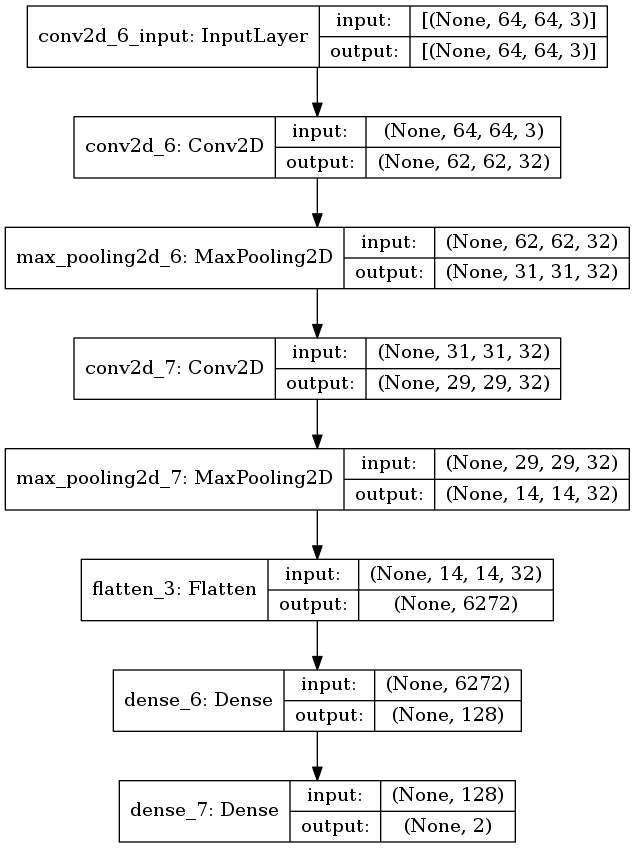

In [11]:
from tensorflow.keras.utils import plot_model

model = simplenet.build_simplenet()
model.summary()
plot_model(model, show_shapes=True)

## Training

In [5]:
MODEL_NAME="simplenet_cracks8020"

In [12]:
simplenet.train_simplenet(  model,
            target_size=(64,64),
            dataset_path=WORKSPACE_PATH+"/data/datasets/cracks_splitted8020/",
            training_path_prefix="train_set",
            test_path_prefix="test_set",
            history_file_path=WORKSPACE_PATH+"/training_logs/",
            history_filename=MODEL_NAME+".csv",
            checkpoint_path=WORKSPACE_PATH+"/model-checkpoints/",
            checkpoint_prefix=MODEL_NAME,
            number_of_epochs=30,
            tensorboard_log_path=WORKSPACE_PATH+"/tensorboard_logs/",
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Epoch 1/30
1000/1000 [==============================] - 585s 585ms/step - loss: 0.0846 - acc: 0.9709 - val_loss: 0.0993 - val_acc: 0.9772
Epoch 2/30
1000/1000 [==============================] - 161s 161ms/step - loss: 0.0465 - acc: 0.9858 - val_loss: 0.0351 - val_acc: 0.9898
Epoch 3/30
1000/1000 [==============================] - 161s 161ms/step - loss: 0.0336 - acc: 0.9898 - val_loss: 0.0243 - val_acc: 0.9941
Epoch 4/30
1000/1000 [==============================] - 161s 161ms/step - loss: 0.0296 - acc: 0.9906 - val_loss: 0.0205 - val_acc: 0.9944
Epoch 5/30
1000/1000 [==============================] - 160s 160ms/step - loss: 0.0249 - acc: 0.9922 - val_loss: 0.0217 - val_acc: 0.9950
Epoch 6/30
1000/1000 [==============================] - 159s 159ms/step - loss: 0.0213 - acc: 0.9935 - val_loss: 0.0192 - val_acc: 0.9945
Epoch 7/30
1000/1000 [==============================] - 158s 158ms/step - loss: 0.0188 

## Training Report

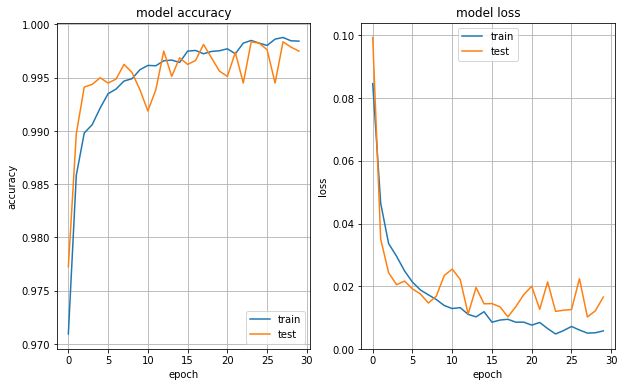

In [13]:
import matplotlib
from utils.plotutils import plot_learning_curves_from_history_file
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)
fig = plot_learning_curves_from_history_file(WORKSPACE_PATH+"/training_logs/"+MODEL_NAME+".csv")

## Export model to SavedModelFormat

In [3]:
import glob
import os

list_of_files = glob.glob(WORKSPACE_PATH+'/model-checkpoints/*.hdf5') 
CHECKPOINT_FILE = max(list_of_files, key=os.path.getctime) # last checkpoint

In [7]:
from utils.export_tools import convert_from_keras_to_savedmodel

convert_from_keras_to_savedmodel(
    input_filename=CHECKPOINT_FILE,
    export_path=WORKSPACE_PATH+'/models/'+MODEL_NAME
)

W0714 22:17:43.135864 140671599372032 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0714 22:17:43.137504 140671599372032 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0714 22:17:43.138561 140671599372032 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp